数据读取-图像

· cv2.IMREAD_COLOR: 彩色图像

· cv2.IMREAD_GRAYSCALE: 灰度图像

In [132]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [63]:
# load image
img001 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img001.jpg')

In [91]:
# 目前是h,w,c 三维图像
img001

array([[[255, 255, 250],
        [255, 255, 251],
        [255, 254, 251],
        ...,
        [251, 250, 246],
        [254, 251, 247],
        [246, 243, 239]],

       [[242, 233, 229],
        [242, 233, 229],
        [246, 237, 233],
        ...,
        [252, 249, 245],
        [253, 248, 245],
        [255, 253, 250]],

       [[172, 158, 152],
        [168, 154, 148],
        [170, 156, 150],
        ...,
        [185, 178, 175],
        [186, 179, 176],
        [182, 175, 172]],

       ...,

       [[162, 150, 150],
        [161, 149, 149],
        [163, 149, 150],
        ...,
        [143, 127, 121],
        [144, 125, 120],
        [143, 124, 119]],

       [[163, 151, 149],
        [164, 152, 150],
        [164, 150, 151],
        ...,
        [141, 125, 119],
        [142, 125, 122],
        [142, 125, 122]],

       [[166, 155, 151],
        [164, 153, 149],
        [166, 152, 153],
        ...,
        [142, 126, 120],
        [143, 126, 123],
        [142, 125, 122]]

In [65]:
# 图像的显示，也可以创建多个窗口
cv2.imshow('img001', img001)
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [133]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [92]:
img001.shape

(720, 720, 3)

In [93]:
img001_gray = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img001.jpg', cv2.IMREAD_GRAYSCALE)
# 变成了h,w二维图像
img001_gray

array([[254, 255, 254, ..., 249, 250, 242],
       [233, 233, 237, ..., 248, 248, 253],
       [158, 154, 156, ..., 178, 179, 175],
       ...,
       [151, 150, 151, ..., 127, 126, 125],
       [152, 153, 152, ..., 125, 126, 126],
       [155, 153, 154, ..., 126, 127, 126]], dtype=uint8)

In [94]:
img001_gray.shape

(720, 720)

In [95]:
cv_show('img001_gray', img001_gray)

In [96]:
# 保存图像
cv2.imwrite('C:/Computer_Vision/OpenCV-Python/references/img001_gray.jpg', img)

True

In [97]:
# 图片底层类型
type(img001_gray)

numpy.ndarray

In [98]:
img001_gray.size

518400

In [99]:
img001_gray.dtype

dtype('uint8')

数据读取-视频

· cv2.VideoCapture可以捕捉摄像头，用数字来控制不同的设备，例如0、1。
· 如果是视频文件，直接指定好路径即可。

In [75]:
vc = cv2.VideoCapture('C:/Computer_Vision/OpenCV-Python/references/video.mp4')

In [76]:
# 检查是否打开正确
if vc.isOpened():
    openvc, frame = vc.read()
else:
    open = False

In [77]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(10) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()


截取部分图像数据

In [78]:
img002 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img002.jpg')
# 截图
img2 = img002[80:580, 150:650]
cv_show('img2', img2)

颜色通道提取

In [79]:
b, g, r = cv2.split(img002)

In [80]:
b

array([[ 40,  40,  40, ...,  32,  33,  33],
       [ 40,  40,  40, ...,  32,  33,  33],
       [ 40,  40,  40, ...,  30,  31,  31],
       ...,
       [ 95, 115, 134, ..., 148, 143, 136],
       [ 95, 114, 133, ..., 153, 150, 144],
       [ 98, 111, 125, ..., 150, 150, 147]], dtype=uint8)

In [81]:
b.shape

(900, 900)

In [82]:
g

array([[ 63,  63,  63, ...,  49,  50,  50],
       [ 63,  63,  63, ...,  49,  50,  50],
       [ 63,  63,  63, ...,  49,  50,  50],
       ...,
       [119, 139, 155, ..., 170, 165, 158],
       [119, 138, 154, ..., 174, 171, 165],
       [122, 135, 146, ..., 171, 171, 168]], dtype=uint8)

In [83]:
r

array([[ 95,  95,  95, ...,  82,  83,  83],
       [ 95,  95,  95, ...,  82,  83,  83],
       [ 95,  95,  95, ...,  82,  83,  83],
       ...,
       [147, 167, 182, ..., 198, 193, 186],
       [147, 166, 181, ..., 201, 198, 192],
       [150, 163, 173, ..., 198, 198, 195]], dtype=uint8)

In [84]:
img002 = cv2.merge((r, g, b))
img.shape

(720, 720)

In [85]:
cv_show('img002', img002)

In [86]:
# 只保留R
cur_img002 = img002.copy()
cur_img002[:, :, 0] = 0 # Set the blue channel to zero
cur_img002[:, :, 1] = 0 # Set the green channel to zero
cv_show('R', cur_img002) # Display the resulting image with only the red channel, with the title 'R'

In [87]:
# 只保留G
cur_img002 = img002.copy()
cur_img002[:, :, 0] = 0 # Set the blue channel to zero
cur_img002[:, :, 2] = 0 # Set the red channel to zero
cv_show('G', cur_img002) # Display the resulting image with only the green channel, with the title 'G'

In [88]:
# 只保留B
cur_img002 = img002.copy()
cur_img002[:, :, 1] = 0 # Set the green channel to zero
cur_img002[:, :, 2] = 0 # Set the red channel to zero
cv_show('B', cur_img002) # Display the resulting image with only the blue channel, with the title 'B'

边界填充

· BORDER_REPLICATE：复制法，也就是复制最边缘像素
· BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制，例如 fedcba|abcdefgh|hgfedcb
· BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴对称，例如 gfedcba|abcdefgh|gfedcba
· BORDER_WRAP：外包装法，例如 cdefgh|abcdefgh|gfedcba
· BORDER_CONSTANT：常量法，常数值填充

In [89]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)
replicate = cv2.copyMakeBorder(img002, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img002, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img002, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img002, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img002, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_CONSTANT, value = 0)

(<Axes: title={'center': 'CONSTANT'}>,
 Text(0.5, 1.0, 'CONSTANT'))

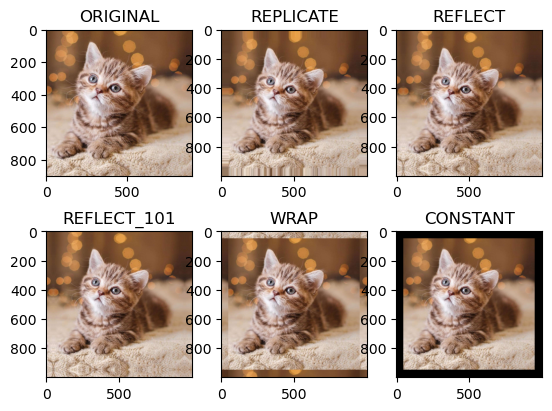

In [90]:
plt.subplot(231), plt.imshow(img002, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

数值计算

In [135]:
# load image
img001 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img001.jpg')
img002 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img002.jpg')

In [136]:
img_002 = img002 + 10
# selects the first 5 rows (:5) of all columns (:) in the blue channel ([:, :, 0]) of the img_002 image.
img002[:5, :, 0]

array([[40, 40, 40, ..., 32, 33, 33],
       [40, 40, 40, ..., 32, 33, 33],
       [40, 40, 40, ..., 30, 31, 31],
       [40, 40, 40, ..., 30, 31, 31],
       [40, 40, 40, ..., 29, 30, 30]], dtype=uint8)

In [137]:
img_002[:5, :, 0]

array([[50, 50, 50, ..., 42, 43, 43],
       [50, 50, 50, ..., 42, 43, 43],
       [50, 50, 50, ..., 40, 41, 41],
       [50, 50, 50, ..., 40, 41, 41],
       [50, 50, 50, ..., 39, 40, 40]], dtype=uint8)

In [138]:
# 超过255就取减去255后的余数
(img002 + img_002)[:5, :, 0]

array([[90, 90, 90, ..., 74, 76, 76],
       [90, 90, 90, ..., 74, 76, 76],
       [90, 90, 90, ..., 70, 72, 72],
       [90, 90, 90, ..., 70, 72, 72],
       [90, 90, 90, ..., 68, 70, 70]], dtype=uint8)

In [139]:
# 超过255就取255
cv2.add(img002, img_002)[:5, :, 0]

array([[90, 90, 90, ..., 74, 76, 76],
       [90, 90, 90, ..., 74, 76, 76],
       [90, 90, 90, ..., 70, 72, 72],
       [90, 90, 90, ..., 70, 72, 72],
       [90, 90, 90, ..., 68, 70, 70]], dtype=uint8)

图像融合

In [140]:
# shape值不一致，无法进行加法
img001 + img002

ValueError: operands could not be broadcast together with shapes (720,720,3) (900,900,3) 

In [141]:
img001.shape

(720, 720, 3)

In [142]:
img002.shape

(900, 900, 3)

In [143]:
img002 = cv2.resize(img002, (720, 720))
img002.shape

(720, 720, 3)

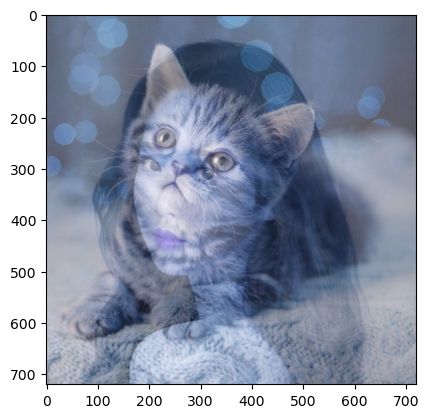

In [148]:
res = cv2.addWeighted(img001, 0.4, img002, 0.6, 0)
plt.imshow(res)

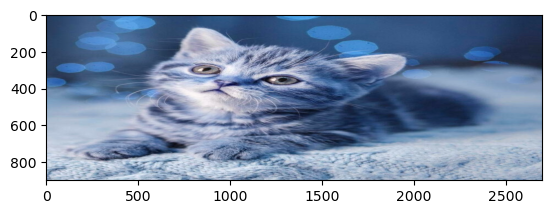

In [125]:
res = cv2.resize(img002, (0, 0), fx = 3, fy = 1)
plt.imshow(res)

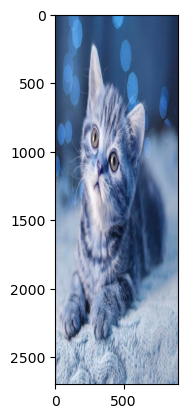

In [126]:
res = cv2.resize(img002, (0, 0), fx = 1, fy = 3)
plt.imshow(res)

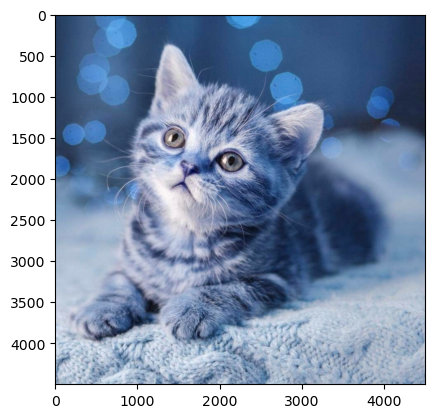

In [127]:
res = cv2.resize(img002, (0, 0), fx = 5, fy = 5)
plt.imshow(res)